#   EDA
## 1. Data preparation

In [2]:
import pandas as pd
import numpy as np
df_countries = pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2')[2]
df_countries = df_countries[['Code', 'Country name (using title case)']]
df_countries.rename(columns={'Code':'Country','Country name (using title case)':'Country name'},inplace=True)
df_countries.to_csv ('../data/countries.csv', index = False, header=True)
df_countries = pd.read_csv('../data/countries.csv')
print(df_countries.info())


df_2020Q1 = pd.read_csv('../data/waqi-covid19-airqualitydata-2020Q1.csv', skiprows=4, engine='python')
df_2020Q2 = pd.read_csv('../data/waqi-covid19-airqualitydata-2020Q2.csv', skiprows=4, engine='python')
df_2020Q3 = pd.read_csv('../data/waqi-covid19-airqualitydata-2020Q3.csv', skiprows=4, engine='python')
df_2020Q4 = pd.read_csv('../data/waqi-covid19-airqualitydata-2020Q4.csv', skiprows=4, engine='python')
df_2020 = pd.concat([df_2020Q1, df_2020Q2, df_2020Q3, df_2020Q4])

df_2020['Date'] = pd.to_datetime(df_2020['Date'])


df = pd.merge(df_2020,df_countries, on='Country')
df = df[['Date', 'City', 'Specie', 'max', 'Country name']]
df.info()
df.head()

df_lockdown_dates = pd.read_csv('../data/countryLockdowndates.csv', engine='python')
df_lockdown_datesJHUMatch = pd.read_csv('../data/countryLockdowndatesJHUMatch.csv', engine='python')
df_lockdown_dates_full = pd.concat([df_lockdown_dates, df_lockdown_datesJHUMatch])
df_lockdown_dates_full['Date'] = pd.to_datetime(df_lockdown_dates_full['Date'])

df_lockdown_dates_full.rename(columns={'Country/Region':'Country name'},inplace=True)
df_lockdown_dates_full = df_lockdown_dates_full[['Country name','Date']]
df_lockdown_dates_full.rename(columns={'Date':'Starting Date'},inplace=True)
df_lockdown_dates_full.tail()
df_final = pd.merge(df, df_lockdown_dates_full, on='Country name')
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       248 non-null    object
 1   Country name  249 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323243 entries, 0 to 2323242
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   City          object        
 2   Specie        object        
 3   max           float64       
 4   Country name  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 106.3+ MB


,Date,City,Specie,max,Country name,Starting Date
0,2020-01-13,Bogotá,so2,2.8,Colombia,2020-03-25
1,2020-01-13,Bogotá,so2,2.8,Colombia,2020-03-25
2,2020-02-25,Bogotá,so2,4.1,Colombia,2020-03-25
3,2020-02-25,Bogotá,so2,4.1,Colombia,2020-03-25
4,2020-03-09,Bogotá,so2,5.4,Colombia,2020-03-25


## Some Helper Functions 

In [3]:
# The function which returns the dataframe by filtering one specific specie
def dataFrame_by_specie(specie):
    df = df_final
    df_specie = df[df['Specie']==specie]
    df_specie = df_specie[['Date', 'City', 'Specie', 'max', 'Country name']]
    return df_specie

# The function which returns a dataframe of the top ten cities on the average_max of one specific specie 
def dataframe_top_ten_cities_by_specie(specie):

    df_specie = dataFrame_by_specie(specie)
    df_specie_byCity = df_specie.groupby('City').agg({"max":np.average})
    df_specie_byCity = df_specie_byCity.sort_values(by=['max'], ascending=False)
    df_top_ten_cities_by_specie = df_specie_byCity.head(10)    
    return df_top_ten_cities_by_specie

dataframe_top_ten_cities_by_specie('no2')


# The function which returns a dataframe of the top ten countries on the average_max of one specific specie 
def dataframe_top_ten_countries_by_specie(specie):
    df_specie = dataFrame_by_specie(specie)
    df_specie_byCountry = df_specie.groupby('Country name').agg({"max":np.average})
    df_specie_byCountry = df_specie_byCountry.sort_values(by=['max'], ascending=False)
    df_top_ten_countries_by_specie = df_specie_byCountry.head(10)    
    return df_top_ten_countries_by_specie

dataframe_top_ten_countries_by_specie('no2')

,max
Country name,
Hong Kong,60.973469
Israel,55.449705
Turkey,41.852165
India,38.122695
Mongolia,36.864031
United Arab Emirates,34.776276
North Macedonia,34.486719
China,34.248367
Greece,30.511979


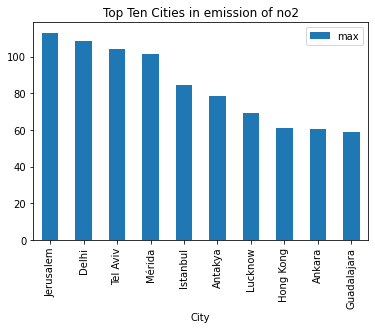

In [4]:
#import matplotlib.pyplot as plt
df = dataframe_top_ten_cities_by_specie('no2')
df.reset_index(inplace=True)
ax = df.plot.bar(x='City', y='max',title='Top Ten Cities in emission of no2') 

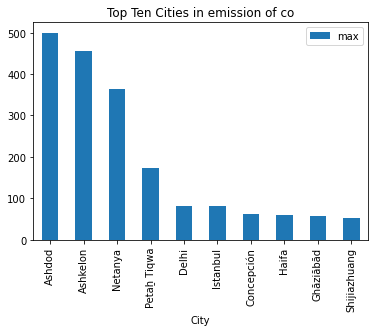

In [5]:
#import matplotlib.pyplot as plt
df = dataframe_top_ten_cities_by_specie('co')
df.reset_index(inplace=True)
ax = df.plot.bar(x='City', y='max',title='Top Ten Cities in emission of co') 

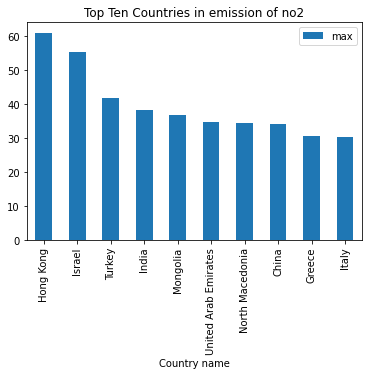

In [6]:
#import matplotlib.pyplot as plt
df = dataframe_top_ten_countries_by_specie('no2')
df.reset_index(inplace=True)
ax = df.plot.bar(x='Country name', y='max',title='Top Ten Countries in emission of no2')  

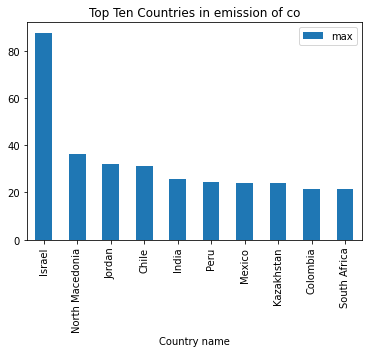

In [7]:
#import matplotlib.pyplot as plt
df = dataframe_top_ten_countries_by_specie('co')
df.reset_index(inplace=True)
ax = df.plot.bar(x='Country name', y='max',title='Top Ten Countries in emission of co')  

In [24]:
# The function which returns a dataframe by filtering the whole dataframe on one specific specie and one single city
def dataFrame_one_specie_by_one_city(specie,city):
    df = dataFrame_by_specie(specie)
    df_byCity = df[df['City']== city]
    return df_byCity 

# The function which returns a dataframe by filtering the whole dataframe on one specific specie and one single country
def dataFrame_one_specie_by_one_country(specie,country):
    df = dataFrame_by_specie(specie)
    df_byCountry = df[df['Country name']== country]
    return df_byCountry

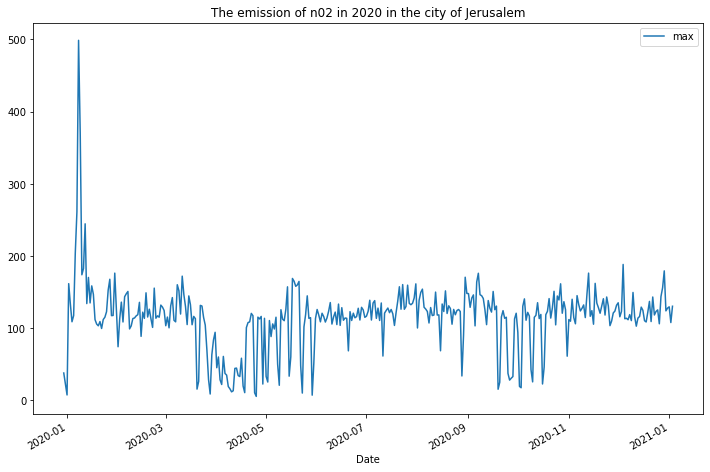

In [25]:
df = dataFrame_one_specie_by_one_city('no2','Jerusalem')
df = df[['Date', 'max']]
df.set_index('Date',inplace=True)
df.head()
ts = df
ax = ts.plot(title='The emission of n02 in 2020 in the city of Jerusalem',figsize=(12,8))

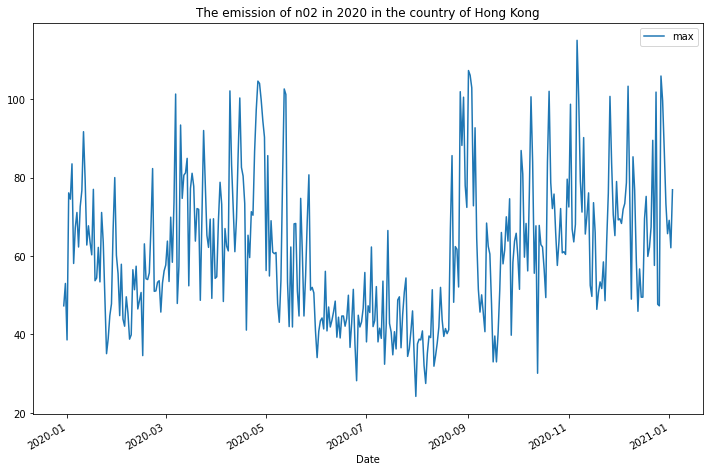

In [26]:
df = dataFrame_one_specie_by_one_country('no2','Hong Kong') 
df = df[['Date', 'max']]
df.set_index('Date',inplace=True)
df.head()
ts = df
ax = ts.plot(title='The emission of n02 in 2020 in the country of Hong Kong',figsize=(12,8))